# What Makes a Pokémon Legendary?

## 1. Introduction
<p>In the world of Pokémon academia, one name towers above any other – Professor Samuel Oak. While his colleague Professor Elm specializes in Pokémon evolution, Oak has dedicated his career to understanding the relationship between Pokémon and their human trainers. A former trainer himself, the professor has first-hand experience of how obstinate Pokémon can be – particularly when they hold legendary status.</p>
<p>For his latest research project, Professor Oak has decided to investigate the defining characteristics of legendary Pokémon to improve our understanding of their temperament. Hearing of our expertise in classification problems, he has enlisted us as the lead researchers.</p>
<p>Our journey begins at the professor's research lab in Pallet Town, Kanto. The first step is to open up the Pokédex, an encyclopaedic guide to 801 Pokémon from all seven generations.</p>
<p><img src="https://assets.datacamp.com/production/project_712/img/legendary_pokemon.jpg" alt="Legendary Pokémon"></p>
<p><em>Source: <a href="https://www.flickr.com/photos/bagogames/">bagogames</a> on Flickr</em></p>

In [82]:
# Load the tidyverse
library(tidyverse)

# Import the dataset and convert variables
pokedex <- read_csv("datasets/pokedex.csv", 
                    col_types = cols(name = col_factor(), 
                                     type = col_factor(),
                                     is_legendary = col_factor()))

# Look at the first six rows
head(pokedex)

# Examine the structure
str(pokedex)

pokedex_number,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
1,Bulbasaur,49,49,0.7,45,88.1,65,65,45,grass,6.9,1,0
2,Ivysaur,62,63,1.0,60,88.1,80,80,60,grass,13.0,1,0
3,Venusaur,100,123,2.0,80,88.1,122,120,80,grass,100.0,1,0
4,Charmander,52,43,0.6,39,88.1,60,50,65,fire,8.5,1,0
5,Charmeleon,64,58,1.1,58,88.1,80,65,80,fire,19.0,1,0
6,Charizard,104,78,1.7,78,88.1,159,115,100,fire,90.5,1,0


spec_tbl_df [801 x 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ pokedex_number : num [1:801] 1 2 3 4 5 6 7 8 9 10 ...
 $ name           : Factor w/ 801 levels "Bulbasaur","Ivysaur",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ attack         : num [1:801] 49 62 100 52 64 104 48 63 103 30 ...
 $ defense        : num [1:801] 49 63 123 43 58 78 65 80 120 35 ...
 $ height_m       : num [1:801] 0.7 1 2 0.6 1.1 1.7 0.5 1 1.6 0.3 ...
 $ hp             : num [1:801] 45 60 80 39 58 78 44 59 79 45 ...
 $ percentage_male: num [1:801] 88.1 88.1 88.1 88.1 88.1 88.1 88.1 88.1 88.1 50 ...
 $ sp_attack      : num [1:801] 65 80 122 60 80 159 50 65 135 20 ...
 $ sp_defense     : num [1:801] 65 80 120 50 65 115 64 80 115 20 ...
 $ speed          : num [1:801] 45 60 80 65 80 100 43 58 78 45 ...
 $ type           : Factor w/ 18 levels "grass","fire",..: 1 1 1 2 2 2 3 3 3 4 ...
 $ weight_kg      : num [1:801] 6.9 13 100 8.5 19 90.5 9 22.5 85.5 2.9 ...
 $ generation     : num [1:801] 1 1 1 1 1 1 1 1 1 1 ...
 $ is_legend

## 2. How many Pokémon are legendary?
<p>After browsing the Pokédex, we can see several variables that could feasibly explain what makes a Pokémon legendary. We have a series of numerical fighter stats – <code>attack</code>, <code>defense</code>, <code>speed</code> and so on – as well as a categorization of Pokemon <code>type</code> (bug, dark, dragon, etc.). <code>is_legendary</code> is the binary classification variable we will eventually be predicting, tagged <code>1</code> if a Pokémon is legendary and <code>0</code> if it is not.</p>
<p>Before we explore these variables in any depth, let's find out how many Pokémon are legendary out of the 801 total, using the handy <code>count()</code> function from the <code>dplyr</code> package.</p>

In [84]:
# Prepare the data
legendary_pokemon <- pokedex %>% 
  count(is_legendary) %>% 
  mutate(prop = n / nrow(pokedex))

# Print the data frame
legendary_pokemon




is_legendary,n,prop
0,731,0.91260924
1,70,0.08739076


## 3. Legendary Pokémon by height and weight
<p>We now know that there are 70 legendary Pokémon – a sizable minority at 9% of the population! Let's start to explore some of their distinguishing characteristics.</p>
<p>First of all, we'll plot the relationship between <code>height_m</code> and <code>weight_kg</code> for all 801 Pokémon, highlighting those that are classified as legendary. We'll also add conditional labels to the plot, which will only print a Pokémon's name if it is taller than 7.5m or heavier than 600kg.</p>

`geom_smooth()` using formula 'y ~ x'
Warning message:
"Removed 20 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 20 rows containing missing values (geom_point)."Warning message:
"Removed 20 rows containing missing values (geom_text)."

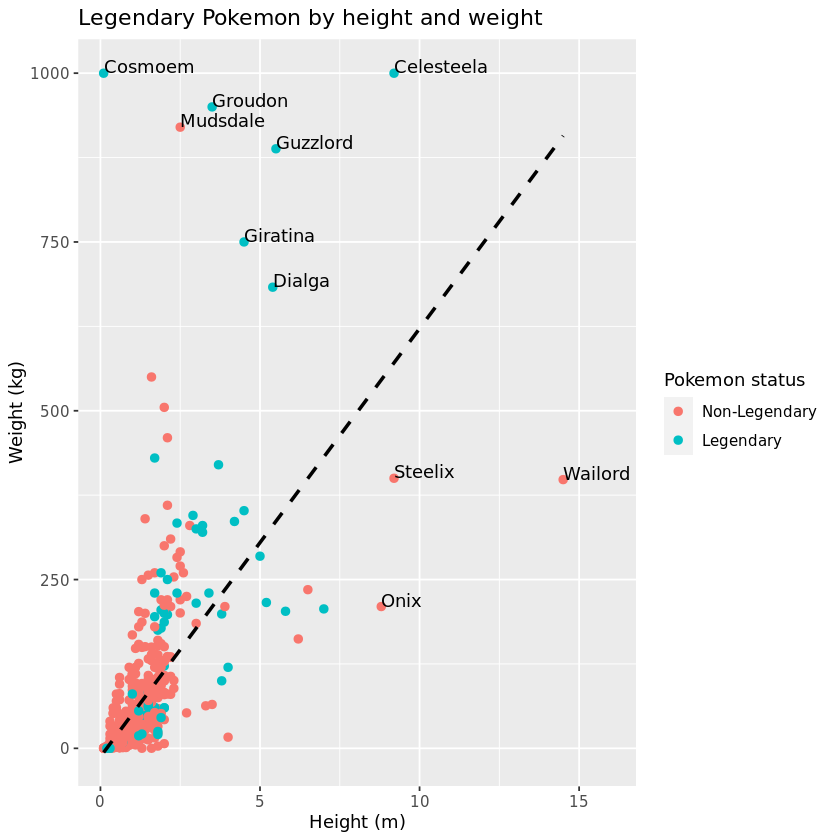

In [86]:
# Prepare the plot
legend_by_heightweight_plot <- pokedex %>% 
  ggplot(aes(x = height_m, y = weight_kg)) +
  geom_point(aes(color = is_legendary), size = 2) +
  geom_text(aes(label = ifelse(height_m > 7.5 | weight_kg > 600, as.character(name), '')), 
            vjust = 0, hjust = 0) +
  geom_smooth(method = "lm", se = FALSE, col = "black", linetype = "dashed") +
  expand_limits(x = 16) +
  labs(title = "Legendary Pokemon by height and weight",
       x = "Height (m)",
       y = "Weight (kg)") +
  guides(color = guide_legend(title = "Pokemon status")) +
  scale_color_manual(labels = c("Non-Legendary", "Legendary"),
                     values = c("#F8766D", "#00BFC4"))

# Print the plot
legend_by_heightweight_plot

## 4. Legendary Pokémon by type
<p>It seems that legendary Pokémon are generally heavier and taller, but with many exceptions. For example, Onix (Gen 1), Steelix (Gen 2) and Wailord (Gen 3) are all extremely tall, but none of them have legendary status. There must be other factors at play.</p>
<p>We will now look at the effect of a Pokémon's <code>type</code> on its legendary/non-legendary classification. There are 18 possible types, ranging from the common (Grass / Normal / Water) to the rare (Fairy / Flying / Ice). We will calculate the proportion of legendary Pokémon within each category, and then plot these proportions using a simple bar chart.</p>

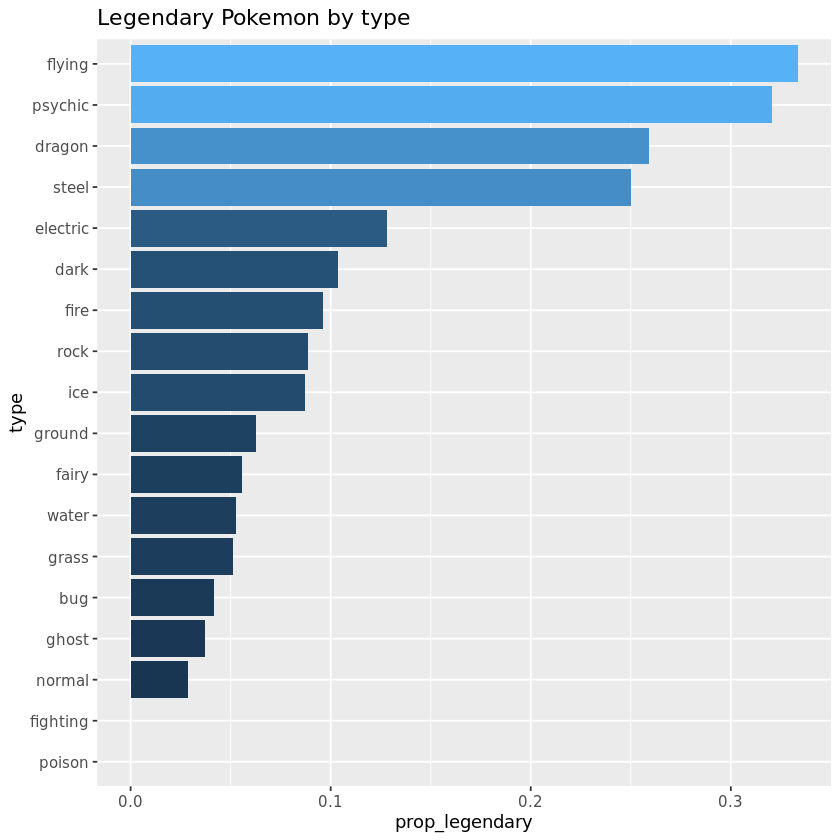

In [88]:
# Prepare the data
legend_by_type <- pokedex %>% 
    group_by(type) %>% 
    mutate(is_legendary = as.numeric(is_legendary) - 1) %>% 
    summarise(prop_legendary = mean(is_legendary)) %>% 
    ungroup() %>% 
    mutate(type = fct_reorder(type, prop_legendary))

# Prepare the plot
legend_by_type_plot <- legend_by_type %>% 
    ggplot(aes(x = type, y = prop_legendary, fill = prop_legendary)) + 
    geom_col() +
    labs(title = "Legendary Pokemon by type") +
    coord_flip() +
    guides(fill = "none")

# Print the plot
legend_by_type_plot

## 5. Legendary Pokémon by fighter stats
<p>There are clear differences between Pokémon types in their relation to legendary status. While more than 30% of flying and psychic Pokémon are legendary, there is no such thing as a legendary poison or fighting Pokémon!</p>
<p>Before fitting the model, we will consider the influence of a Pokémon's fighter stats (<code>attack</code>, <code>defense</code>, etc.) on its status. Rather than considering each stat in isolation, we will produce a boxplot for all of them simultaneously using the <code>facet_wrap()</code> function.</p>

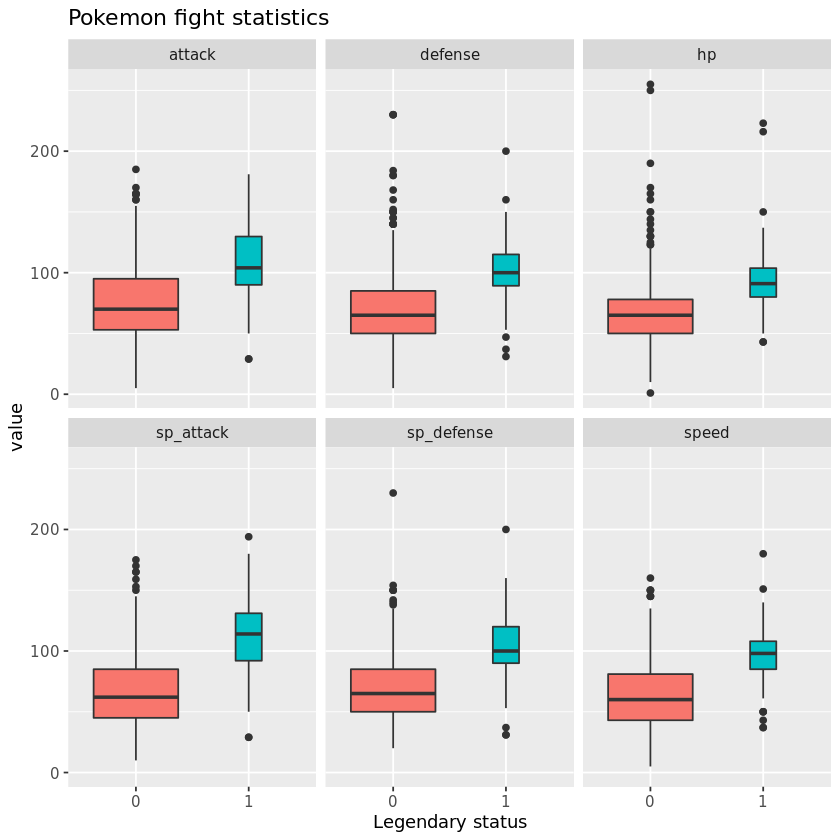

In [90]:
# Prepare the data
legend_by_stats <- pokedex  %>% 
  select(is_legendary, attack, sp_attack, defense, sp_defense, hp, speed)  %>% 
  gather(key = fght_stats, value = value, -is_legendary) 

# Prepare the plot
legend_by_stats_plot <- legend_by_stats %>% 
 ggplot(aes(x = is_legendary, y = value, fill = is_legendary)) +
 geom_boxplot(varwidth = TRUE) +
 facet_wrap(~fght_stats) +
 labs(title = "Pokemon fight statistics",
        x = "Legendary status") +
 guides(fill = "none")

# Print the plot
legend_by_stats_plot

## 6. Create a training/test split
<p>As we might expect, legendary Pokémon outshine their ordinary counterparts in all fighter stats. Although we haven't formally tested a difference in means, the boxplots suggest a significant difference with respect to all six variables. Nonetheless, there are a number of outliers in each case, meaning that some legendary Pokémon are anomalously weak.</p>
<p>We have now explored all of the predictor variables we will use to explain what makes a Pokémon legendary. Before fitting our model, we will split the <code>pokedex</code> into a training set (<code>pokedex_train</code>) and a test set (<code>pokedex_test</code>). This will allow us to test the model on unseen data.</p>

In [92]:
# Set seed for reproducibility
set.seed(1234)

# Save number of rows in dataset
n <- nrow(pokedex)

# Generate 60% sample of rows
sample_rows <- sample(n, 0.6*n)

# Create training set
pokedex_train <- pokedex  %>% 
  filter(row_number() %in% sample_rows)

# Create test set
pokedex_test <- pokedex  %>% 
  filter(!row_number() %in% sample_rows)

## 7. Fit a decision tree
<p>Now we have our training and test sets, we can go about building our classifier. But before we fit a random forest, we will fit a simple <strong>classification decision tree</strong>. This will give us a baseline fit against which to compare the results of the random forest, as well as an informative graphical representation of the model.</p>
<p>Here, and also in the random forest, we will omit incomplete observations by setting the <code>na.action</code> argument to <code>na.omit</code>. This will remove a few Pokémon with missing values for <code>height_m</code> and <code>weight_kg</code> from the training set. Remember the warning messages when we made our height/weight plot in Task 3? These are the Pokémon to blame!</p>

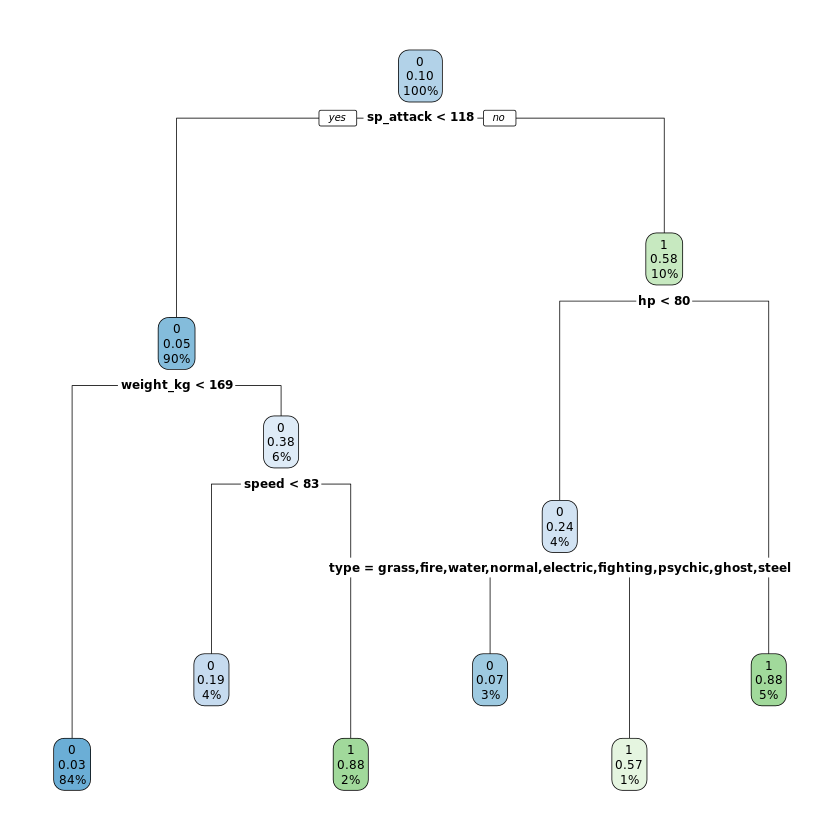

In [94]:
# Load packages and set seed
library(rpart)
library(rpart.plot)
set.seed(1234)

# Fit decision tree
model_tree <- rpart(is_legendary ~ attack + defense + height_m + 
                    hp + sp_attack + sp_defense + speed + type + weight_kg,
                       data = pokedex_train,
                       method = "class",
                       na.action = na.omit)

# Plot decision tree
rpart.plot(model_tree)

## 8. Fit a random forest
<p>Each node of the tree shows the predicted class, the probability of being legendary, and the percentage of Pokémon in that node. The bottom-left node, for example – for those with <code>sp_attack &lt; 118</code> and <code>weight_kg &lt; 169</code> – represents 84% of Pokémon in the training set, predicting that each only has a 3% chance of being legendary.</p>
<p>Decision trees place the most important variables at the top and exclude any they don't find to be useful. In this case, <code>sp_attack</code> occupies node 1 while <code>attack</code>, <code>defense</code>, <code>sp_defense</code> and <code>height_m</code> are all excluded.</p>
<p>However, decision trees are unstable and sensitive to small variations in the data. It therefore makes sense to fit a <strong>random forest</strong> – an ensemble method that averages over several decision trees all at once. This should give us a more robust model that classifies Pokémon with greater accuracy.</p>

In [96]:
# Load package and set seed
library(randomForest)
set.seed(1234)

# Fit random forest
model_forest <- randomForest(is_legendary ~ attack + defense + height_m + 
                         hp + sp_attack + sp_defense + speed + type + weight_kg,
                         data = pokedex_train,
                         importance = TRUE,
                         na.action = na.omit)

# Print model output
print(model_forest)


Call:
 randomForest(formula = is_legendary ~ attack + defense + height_m +      hp + sp_attack + sp_defense + speed + type + weight_kg, data = pokedex_train,      importance = TRUE, na.action = na.omit) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 7.05%
Confusion matrix:
    0  1 class.error
0 411  9  0.02142857
1  24 24  0.50000000


## 9. Assess model fit
<p>Looking at the model output, we can see that the random forest has an out-of-bag (OOB) error of 7.48%, which isn't bad by most accounts. However, since there are <strong>24 true positives</strong> and <strong>24 false negatives</strong>, the model only has a recall of 50%, which means that it struggles to successfully retrieve every legendary Pokémon in the dataset.</p>
<p>In order to allow direct comparison with the decision tree, we will plot the <strong>ROC curves</strong> for both models using the <code>ROCR</code> package, which will visualize their true positive rate (TPR) and false positive rate (FPR) respectively. The closer the curve is to the top left of the plot, the higher the area under the curve (AUC) and the better the model.</p>

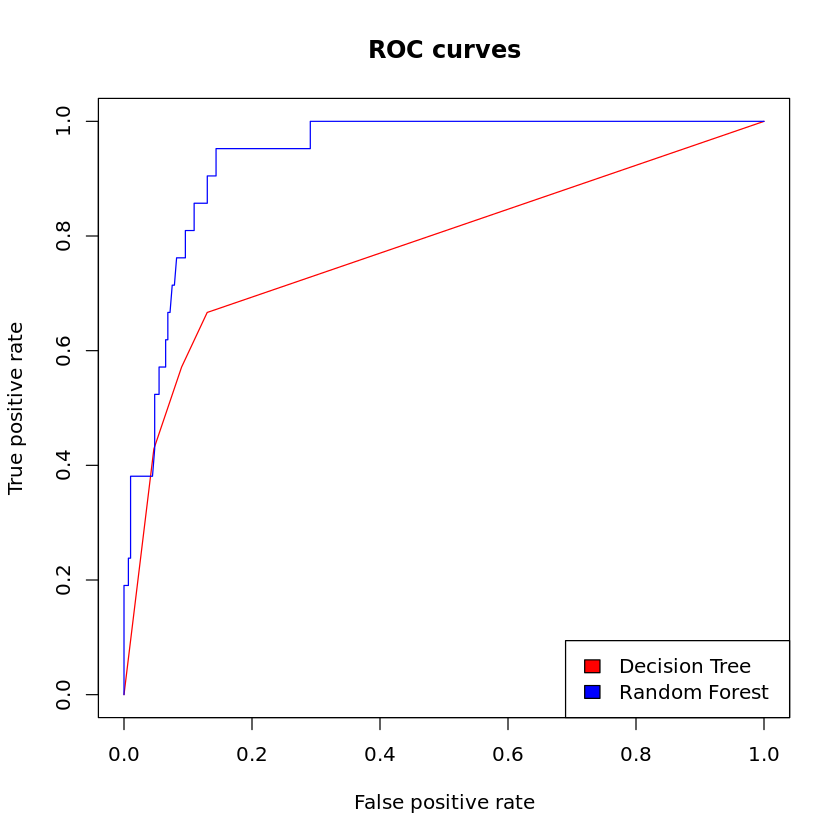

In [98]:
# Load the ROCR package
library(ROCR)

# Create prediction and performance objects for the decision tree
probs_tree <- predict(model_tree, pokedex_test, type = "prob")
pred_tree <- prediction(probs_tree[,2], pokedex_test$is_legendary)
perf_tree <- performance(pred_tree, "tpr", "fpr")

# Create prediction and performance objects for the random forest
probs_forest <- predict(model_forest, pokedex_test, type = "prob")
pred_forest <- prediction(probs_forest[,2], pokedex_test$is_legendary)
perf_forest <- performance(pred_forest, "tpr", "fpr")

# Plot the ROC curves: first for the decision tree, then for the random forest
plot(perf_tree, col = "red", main = "ROC curves")
plot(perf_forest, add = TRUE, col = "blue")
legend(x = "bottomright",  legend = c("Decision Tree", "Random Forest"), fill = c("red", "blue"))

## 10. Analyze variable importance
<p>It's clear from the ROC curves that the random forest is a substantially better model, boasting an AUC (not calculated above) of 91% versus the decision tree's 78%. When calculating variable importance, it makes sense to do so with the best model available, so we'll use the random forest for the final part of our analysis.</p>
<p>Note that a random forest returns two measures of variable importance:</p>
<ul>
<li><code>MeanDecreaseAccuracy</code> – how much the model accuracy suffers if you leave out a particular variable</li>
<li><code>MeanDecreaseGini</code> – the degree to which a variable improves the probability of an observation being classified one way or another (i.e. 'node purity').</li>
</ul>
<p>Together, these two measures will allow us to answer our original research question – what makes a Pokémon legendary?</p>

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
attack,5.5880374,8.5275682,9.145018,6.203285
defense,0.6724663,12.2083778,8.506461,6.793236
height_m,4.1403952,6.7509476,7.533695,6.579863
hp,2.7180639,19.2406506,14.980599,9.499892
sp_attack,6.3947972,22.5417527,18.567857,17.415111
sp_defense,-0.8501697,15.1682650,10.919369,9.857089
speed,2.2799561,21.0596369,15.838444,11.308568
type,3.3473633,0.7726262,3.347259,9.440971
weight_kg,8.8857876,6.6917782,11.343187,9.760121


,MeanDecreaseAccuracy,MeanDecreaseGini
attack,9.145018,6.203285
defense,8.506461,6.793236
height_m,7.533695,6.579863
hp,14.980599,9.499892
sp_attack,18.567857,17.415111
sp_defense,10.919369,9.857089
speed,15.838444,11.308568
type,3.347259,9.440971
weight_kg,11.343187,9.760121


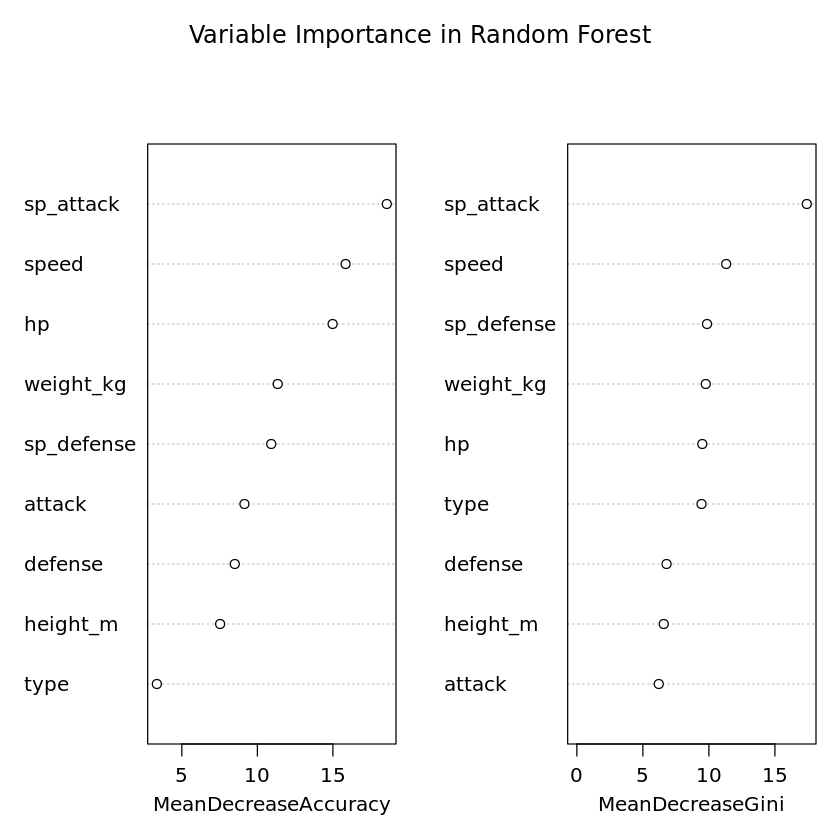

In [100]:
# Print variable importance measures
importance_forest <- importance(model_forest)
importance_forest

# Create a dotchart of variable importance
varImpPlot_forest <- varImpPlot(model_forest, main = "Variable Importance in Random Forest")
varImpPlot_forest

## 11. Conclusion
<p>According to the variable importance plot, <code>sp_attack</code> is the most important factor in determining whether or not a Pokémon is legendary, followed by <code>speed</code>. The plot doesn't tell us whether the variables have a positive or a negative effect, but we know from our exploratory analysis that the relationship is generally positive. We therefore conclude that legendary Pokémon are characterized primarily by the power of their special attacks and secondarily by their speediness, while also exhibiting higher fighting abilities across the board.</p>
<p>Congratulations on completing your research into legendary Pokémon – Professor Oak is excited to share the findings! To finish, we'll answer a few of his questions about the variable importance results.</p>

In [102]:
# According to the MeanDecreaseAccuracy plot:

# Q1. Is the `attack` or `defense` variable more important?
answer1 <- "attack"

# Q2. Is the `weight_kg` or `height_m` variable more important?
answer2 <- "weight_kg"

# According to the MeanDecreaseGini plot:

# Q3. Is the `attack` or `defense` variable more important?
answer3 <- "defense"

# Q4. Is the `weight_kg` or `height_m` variable more important?
answer4 <- "weight_kg"